In [91]:
from essentials.Util import load_from_pickle_file
from scipy.io import savemat


results_dir = 'results/ER0.5625/m10/'
truth, out, bias = load_from_pickle_file(results_dir+'simulation_output')

In [92]:
ensemble = out[0].copy()

In [93]:
phi = ensemble.get_current_state[:-ensemble.Na]
alpha = ensemble.get_current_state[-ensemble.Na:]


import numpy as np
phi, alpha = [np.mean(xx, axis=-1) for xx in [phi, alpha]]


In [99]:
from essentials.physical_models import Annular


kwargs = dict(phi0=phi)
for key, val in zip(ensemble.est_a, alpha):
    kwargs[key] = val

case = Annular(**kwargs)

In [100]:
psi, t = case.time_integrate(Nt=9.//case.dt)
case.update_history(psi=psi, t=t)

y = case.get_observable_hist(len(t))


(8.998047, 8.99998)

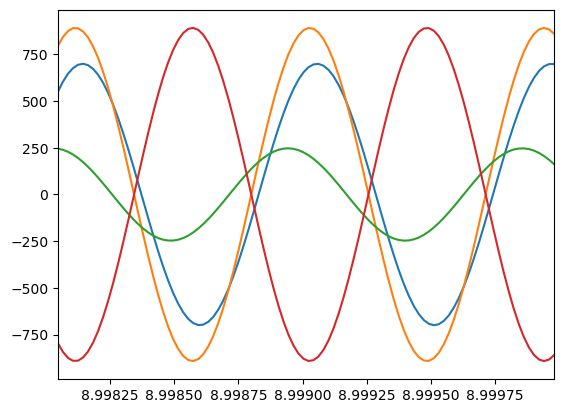

In [101]:
import matplotlib.pyplot as plt
plt.plot(t, np.mean(y, axis=-1))
plt.xlim([t[-100], t[-1]])



In [107]:
Nt = int(8.//case.dt)+1
y = case.get_observable_hist(Nt)
t = case.hist_t[-Nt:]
savemat('presure_for_quaternions.mat', {'y': y, 't': t})

In [ ]:
psi1, t1 = ensemble.time_integrate(Nt=case.t_transient//case.dt)

ensemble.update_history(psi=psi1, t=t1)
y1 = ensemble.get_observable_hist(len(t1))


In [ ]:
import matplotlib.pyplot as plt
plt.plot(t, np.mean(y1, axis=-1))
plt.xlim([t[-100], t[-1]])